# Iris Dataset Classifier


<b>Problem:</b> We need to classify Iris flowers into 3 labels -- setosa, versicolor, and virginica based on features given in our dataset.

Dataset: https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

## Resources
https://medium.com/gft-engineering/start-to-learn-machine-learning-with-the-iris-flower-classification-challenge-4859a920e5e3

https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b

In [6]:
from sklearn.datasets import load_iris
iris_ds = load_iris()

In [9]:
data = pd.DataFrame(iris_ds.data, columns=iris_ds.feature_names)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Add features to data
data["species"] = iris_ds.target

In [18]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
data.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [20]:
# !wget https://github.com/terryz1/Iris_Classification/blob/master/data/data.csv

--2020-10-06 22:50:01--  https://github.com/terryz1/Iris_Classification/blob/master/data/data.csv
Resolving github.com (github.com)... 13.234.210.38
Connecting to github.com (github.com)|13.234.210.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv’

data.csv                [   <=>              ] 124.02K   278KB/s    in 0.4s    

2020-10-06 22:50:02 (278 KB/s) - ‘data.csv’ saved [126998]



In [23]:
data = pd.read_csv('iris_data.csv')

In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [27]:
# train test splits
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state=42)

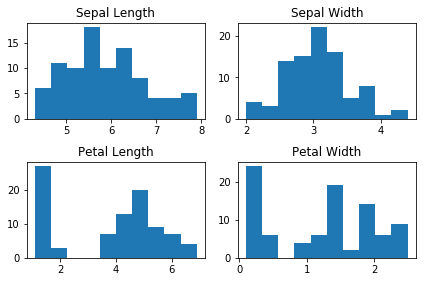

In [33]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(train['sepal_length'], bins = n_bins);
axs[0, 0].set_title('Sepal Length');
axs[0, 1].hist(train['sepal_width'], bins = n_bins);
axs[0, 1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0)

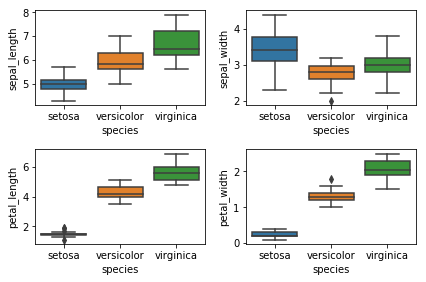

In [34]:
# box plot
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y='sepal_length', data=train, order=cn, ax=axs[0, 0]);
sns.boxplot(x = 'species', y='sepal_width', data=train, order=cn, ax=axs[0, 1]);
sns.boxplot(x = 'species', y='petal_length', data=train, order=cn, ax=axs[1, 0]);
sns.boxplot(x = 'species', y='petal_width', data=train, order=cn, ax=axs[1, 1]);

# add some spacing padding between subplots
fig.tight_layout(pad=1.0)

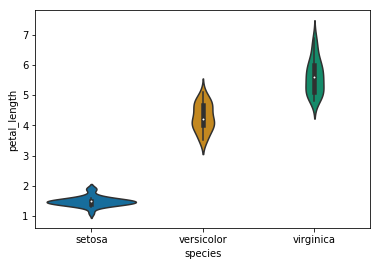

In [35]:
# Violin plot
sns.violinplot(x="species", y="petal_length", data=train, size=5, order=cn, palette='colorblind');

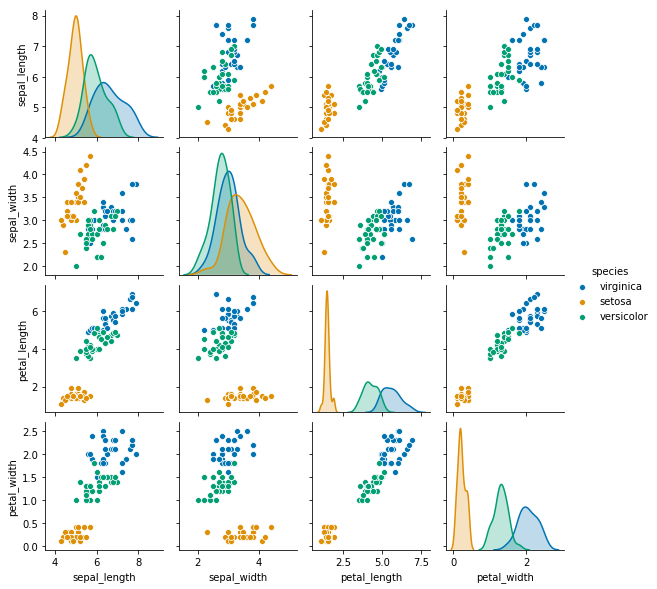

In [36]:
sns.pairplot(train, hue="species", height=2, palette='colorblind')

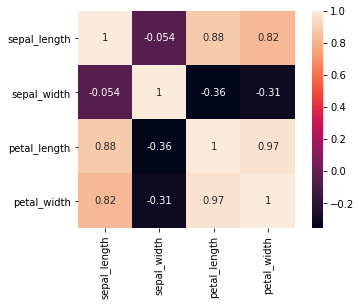

In [37]:
# Quantitatively examine
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated.

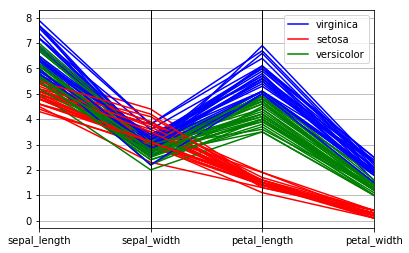

In [38]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

We acn see petal measurements can separate species better than the sepal ones.


In [39]:
# Separate out the class label and features
X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train.species
X_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test.species

## Decision Tree



In [40]:
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)
print('The accuracy of Decision Tree is', "{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The accuracy of Decision Tree is 0.983


In [41]:
# feature importance in order of sepal_length, sepal_width, petal_length, petal_width
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

Therefore, the first two features are of no importance and only the petal ones are used to build this tree.

[Text(209.25, 380.52, 'petal_width <= 0.7\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal_length <= 4.95\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal_width <= 1.65\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal_width <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

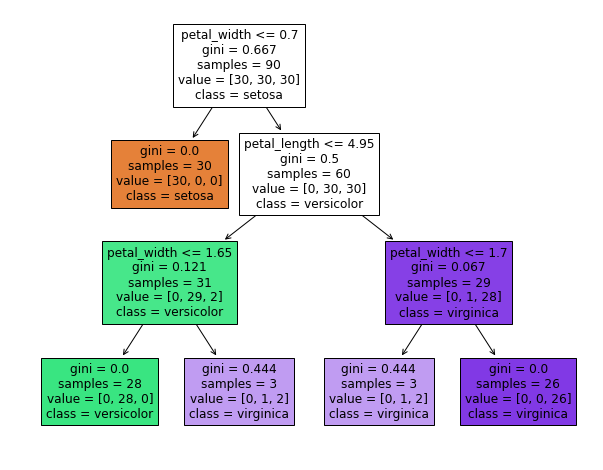

In [42]:
plt.figure(figsize = (10, 8))
plot_tree(mod_dt, feature_names=fn, class_names=cn, filled=True)

For each split, left -> yes, right -> no

From the figure we can see, all terminal nodes are pure besides the two “light purple” boxes at the bottom. We can less confident regarding instances in those two categories.